[Mahefa, December 12, 2019]
# Noise sensitivity in the minimal spanning tree.

Let $G$ be a graph. Assign each edge $e$ of $G$ a label $U_e\in \mathbb{R}.$ 

* __Definition__: A minimal spanning tree (MST) of $G$ with respect to the edge label $(U_e)_{e\in E(G)}$ is a spanning tree $T$ whose total weight $\sum_{e\in  E(T)}U_e$ is minimal among all spanning trees of $G.$

The weight and the graph diameter of a minimal spanning tree of $G$ are denoted respectively by $W(\{U_e\})$ and $\mathrm{diam}(U_e)$.

The function ```tree.minimum_spanning_edges``` (imported from networkx.algorithms) outputs the edges  a MST of an undirected weighted connected graph. Let us first see how this function works and illustrate the definition of MST in the following simple example.

In [13]:
# usefull package
import networkx as nx
from networkx.algorithms import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G = nx.Graph()
G.add_weighted_edges_from([(1,2, 0.5), (1,3,0.2), (2,3, 0.9), (1,5,0.1), (3,5,0.6)]) # add edge with weight (node1, node 2, weight)

In [3]:
edge_MST = list(tree.minimum_spanning_edges(G, algorithm='kruskal', weight='weight')) # list of edges of the minimal spanning tree with relevant informations

This 'edge_MST' is a list of 3-tuples (node1, node 2, weight) where (node 1, node 2) is an edge of G and weight is a one element dictionary keyed by "weight".
The following code shows how it looks like.

In [4]:
edge_MST 

[(1, 5, {'weight': 0.1}), (1, 3, {'weight': 0.2}), (1, 2, {'weight': 0.5})]

In [5]:
pos = nx.drawing.nx_pydot.graphviz_layout(G) # compute the position of each nodes
labels = nx.get_edge_attributes(G,'weight') # label each edge of G with their weight

In [6]:
# create a minimal uniform spanning tree of G
T = nx.Graph()
T.add_weighted_edges_from([(edge_MST[i][0], edge_MST[i][1], edge_MST[i][2]['weight']) for i in range(len(edge_MST))])

/home/mahefa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


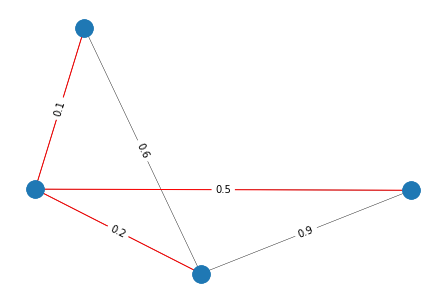

In [7]:
nx.draw(G,pos, width = 0.4)
nx.draw(T,pos, edge_color = 'red')
v = nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) # draw the graph G and indicate the weight of each graph
v = nx.draw_networkx_edge_labels(T,pos,edge_labels=labels) # highlight an MST of G in red 
plt.show()

## In this simulation, we will look at the complete graph $G = K_n$ of size $n$ and we assume that $(U_e)_{e\in E(G)}$ are iid real-valued random variables. Given the probability distribution of $U_e$, we are interested in the total weight and the diameter of a MST of G.

# __(a) Case  $U_e\sim \mathrm{Unif}[0,1].$__

The following function inputs a positive integr $n$ and outputs both the total edge_weight and the diameter of a Minimal Spanning Tree of $G=K_n$ in the following way:

1. Create two empty graphs G and T,
2. assign each edge $e$ of $G$ a weight  $U_e\sim \mathrm{unif}[0,1]$,
3. take the edges of a MST of $K_n$ using the function ```tree.minimum_spanning_edge```, and save them in the list called  __edge_list__ , 
4. add the edges found in 3- to the tree T,
5. compute and output the total edge_weight and the diameter of T.

In [15]:
def MST(n):
    G = nx.Graph()
    T = nx.Graph()
    edges = list(nx.complete_graph(n).edges()) # these are all possible edges
    for e in edges:
        U = np.random.uniform(0,1) # generate the random weight
        G.add_edge(e[0],e[1], weight = U) # add weighted edge
    edge_MST = list(tree.minimum_spanning_edges(G, algorithm='kruskal', weight='weight')) ## list the edge of a MST
    T.add_weighted_edges_from([(edge_MST[i][0], edge_MST[i][1], edge_MST[i][2]['weight']) for i in range(len(edge_MST))]) # add the listed edge to the graph T
    return (sum([edge_MST[i][2]['weight'] for i in range(len(edge_MST))]), nx.diameter(T))

In [9]:
MST(5)

(0.9237538129588143, 4)

#### __Distribution, mean and standard deviation of the weight $W(\{U_e\})$ of a MST of G.__

We are going to prove the following claim:

__Claim:__ 
 1. $\mathbb{E}W(\{U_e\})$ is uniformly bounded, i.e $W(\{U_e\})\leq c$ for all $n\in \mathbb{N}$, where $c$ is a constante.
 2. Var($W(\{U_e\})$) is an decreasing function of $n$.

We are going to create four lists of 200 independent trials of $W(\{U_e\})$ that corresponds respectively to $n=10$, $n=30$ $n=50$ and $n=100$, and we will plot the histogram of each of them in the same figure.

In [10]:
#Distribution of the weight for n= 10, 50 and 100
weight_MST_10 = np.array([MST(10)[0] for i in range(200)]) # sample 100 weight for n = 10
weight_MST_30 = np.array([MST(30)[0] for i in range(200)]) # sample 100 weight for n = 30 
weight_MST_50 = np.array([MST(50)[0] for i in range(200)]) # sample 100 weight for n = 50 
weight_MST_100 = np.array([MST(100)[0] for i in range(200)]) # sample 100 weight for n = 100

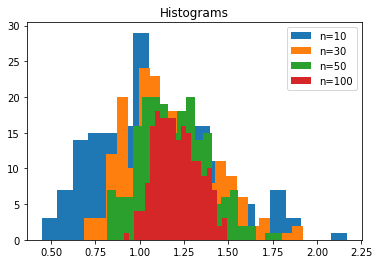

In [16]:
#Histogramm
plt.hist(weight_MST_10, bins =20, label = 'n=10') # distribution for the case n = 10
plt.hist(weight_MST_30, bins = 20, label = 'n=30')# distribution for the case n = 30
plt.hist(weight_MST_50, bins = 20, label = 'n=50')# distribution for the case n = 50
plt.hist(weight_MST_100, bins = 20, label = 'n=100')# distribution for the case n = 100
plt.title('Histograms')
plt.legend()
plt.show()

As we can see in the last plot above, the histogram becomes more concentrated when $n$ increases, this shows that the standard deviation becomes smaller and smaller. 

For more visualization, let us plot the corresponding estimated probability distribution with the function ``` pd.Series().plot.kde ``` in the same figure.

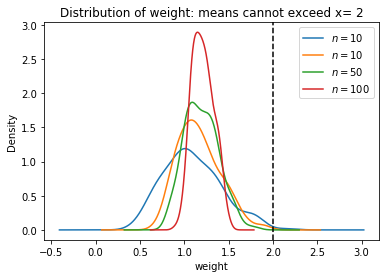

In [14]:
pd.Series(weight_MST_10).plot.kde( label = r'$n= 10$') # plot the approximated density for the case n=10
pd.Series(weight_MST_30).plot.kde( label = r'$n= 10$') # plot the approximated density for the case n=30
pd.Series(weight_MST_50).plot.kde( label = r'$n= 50$') # plot the approximated density for the case n = 50
pd.Series(weight_MST_100).plot.kde( label = r'$n= 100$') # plot the approximated density for the case n = 100
plt.xlabel('weight')
plt.axvline(2, ls = '--', c='black') # this is a black dashed line at x=2.
plt.title('Distribution of weight: means cannot exceed x= 2')
plt.legend()
plt.show()

#### __Distribution, mean and standard deviation of the diameter $\mathrm{diam}(\{U_e \})$ of a MST of $G$.__

The goal of this part is to show that both the mean and the variance of $\mathrm{diam}(\{U_e \})$ are increasing function of $n$.

We __claim__ here that both the mean and the standard deviation of $\mathrm{diam}(\{U_e\})$ increase with $n$.

In order to view our claim, we are going to plot the histogram of 200 samples of $\mathrm{diam}(\{U_e\})$ that corresponds to $n= 10, 30, 50$ and $100$

In [18]:
#Distribution of the diameter for n = 10, 50 and 100
diameter_MST_10 = np.array([MST(10)[1] for i in range(200)])# sample 100 diameter for n = 10
diameter_MST_30 = np.array([MST(30)[1] for i in range(200)])# sample 100 diameter for n = 30
diameter_MST_50 = np.array([MST(50)[1] for i in range(200)])# sample 100 diameter for n = 50
diameter_MST_100 = np.array([MST(100)[1] for i in range(200)])# sample 100 diameter for n = 100

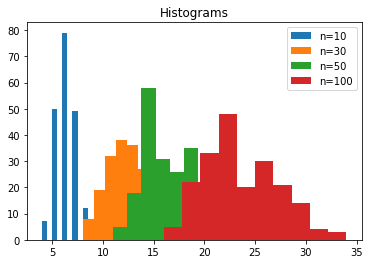

In [19]:
#histogram
plt.hist(diameter_MST_10, bins =10, label = 'n=10')# distribution for the case n = 10
plt.hist(diameter_MST_30, bins = 10, label = 'n=30')# distribution for the case n = 30
plt.hist(diameter_MST_50, bins = 10, label = 'n=50')# distribution for the case n = 50
plt.hist(diameter_MST_100, bins = 10, label = 'n=100')# distribution for the case n = 100
plt.title('Histograms')
plt.legend()
plt.show()

The estimated density distriution below (like in the case of the weight) makes things more clear:

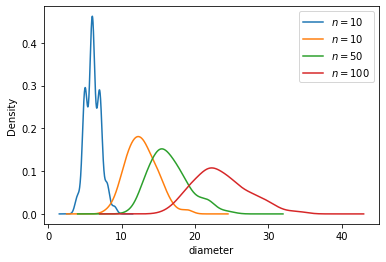

In [20]:
pd.Series(diameter_MST_10).plot.kde( label = r'$n= 10$') # plot the approximated density for the case n=10
pd.Series(diameter_MST_30).plot.kde( label = r'$n= 10$')# plot the approximated density for the case n=30
pd.Series(diameter_MST_50).plot.kde( label = r'$n= 50$')# plot the approximated density for the case n=50
pd.Series(diameter_MST_100).plot.kde( label = r'$n= 100$')# plot the approximated density for the case n=100
plt.xlabel('diameter')
plt.legend()
plt.show()

Therefore, both the mean and the standard deviation of $\mathrm{diam}(\{U_e\})$ are increasing function of $n$.

# __(b) MST with small noise on the labels.__

Let $\epsilon$ be a small positive number and let $(U_e)_{e\in E(G)}$ be iid $\mathrm{unif}[0,1]$ (like in part __(a)__). 

Given a small and positive $\epsilon$, let $\tilde{U}_e$ to be equal to $U_e$ with probability $1-\epsilon$ and an independent $\mathrm{unif}[0,1]$ with probability $\epsilon$.

For a fixed $\epsilon$, we are interested in the correlations $\mathrm{Corr}(W(\{U_e\}), W(\{\tilde{U}_e\}))$ and $\mathrm{Corr}(\mathrm{diam}(\{U_e\}), \mathrm{diam}(\{\tilde{U}_e\}))$.

Let us create function __MST_tilde__ having as input a natural number $n$ and a positive number $\epsilon$. Our function outputs a list of (weight, diameter) that corresponds to the labels $U_e$ and $\tilde{U}_e$ in the following way:

1. Assign each edge of $G$ a $\mathrm{Unif}[0,1]$ label,
2. Create an empty graph $G_{tilde}$, and for each edge $e$ of $G$: take $test\in [0,1]$ uniformly randomly. If $test \leq 1-\epsilon$, then we $G_{tilde}$ the edge $e$ with the same weight; if not, we add $G_{tilde}$ the edge $e$ with another uniform random weight.
3. Take the edges of a MST of $G$ and $G_tilde$ and create the corresponding MST ($T$ and $T_{tilde}$ respectively), use the function ```tree.minimum_spanning_edges```.
4. Return the total weight and the diameter of both $T$ and $T_{tilde}$.

In [21]:
def MST_tilde(n, epsilon=0.1):
    G = nx.Graph()
    G_tilde = nx.Graph()
    T = nx.Graph()
    T_tilde = nx.Graph()
    edges = list(nx.complete_graph(n).edges() ) # possible edges
   
    # add edges with uniform weight to G.
    G.add_weighted_edges_from([(e[0], e[1], np.random.uniform(0,1)) for e in edges]) 
    
    
    # add weighted edge to G_tilde.
    for e in G.edges():
        weight_e = G.get_edge_data(e[0],e[1])['weight']
        test = np.random.uniform(0,1)
        if test <= 1-epsilon:
            G_tilde.add_weighted_edges_from([(e[0], e[1],  weight_e)])  # the weight is preserved here
        if test > 1-epsilon:
            G_tilde.add_weighted_edges_from([(e[0], e[1],  np.random.uniform(0,1))])  # the weight changed here
            
   


   # take the MST for G, as well as its weight and its diameter
  
    edge_MST = list(tree.minimum_spanning_edges(G, algorithm='kruskal', weight='weight'))
    
    T.add_weighted_edges_from([(edge_MST[i][0], edge_MST[i][1], edge_MST[i][2]['weight']) for i in range(len(edge_MST))])
    
    weight = sum([edge_MST[i][2]['weight'] for i in range(len(edge_MST))])
    
    diameter = nx.diameter(T)
 



    # take MST for G_tilde, as well as its weight and diameter (Edges of G_tilde are generated from the edges of G)
    
    edge_MST_tilde = list(tree.minimum_spanning_edges(G_tilde, algorithm='kruskal', weight='weight', keys=True, data=True, ignore_nan=False))
    
    T_tilde.add_weighted_edges_from([(edge_MST_tilde[i][0], edge_MST_tilde[i][1], edge_MST_tilde[i][2]['weight']) for i in range(len(edge_MST_tilde))])
    
    weight_tilde = sum([edge_MST_tilde[i][2]['weight'] for i in range(len(edge_MST_tilde))])
    
    diameter_tilde = nx.diameter(T_tilde)
    
    
    return [(weight, diameter), (weight_tilde, diameter_tilde)]
   

In [22]:
MST_tilde(5,0.1)

[(0.4285685874614462, 4), (0.7290856762589107, 4)]

#### We fix $\epsilon = 0.1$ and we are going to take 100 independent trials of outputs of the function MST_tilde for the case $n=10$, $20$ and $50$.

In [25]:
Data_list10 = [MST_tilde(10,0.1) for i in range(100)]
Data_list20 = [MST_tilde(20,0.1) for i in range(100)]
Data_list50 = [MST_tilde(50,0.1) for i in range(100)]

#### __Correlation of the weight:__ 
Let us take the weight from the Data_list above and compute the correlation of the weight using the function ```corrcoef```.

In [26]:
#n=10
weight_10 = np.array([Data_list10[i][0][0] for i in range(len(Data_list10))])
weight_10_tilde = np.array([Data_list10[i][1][0] for i in range(len(Data_list10))])

#n=20
weight_20 = np.array([Data_list20[i][0][0] for i in range(len(Data_list20))])
weight_20_tilde = np.array([Data_list20[i][1][0] for i in range(len(Data_list20))])

#n=50
weight_50 = np.array([Data_list50[i][0][0] for i in range(len(Data_list50))])
weight_50_tilde = np.array([Data_list50[i][1][0] for i in range(len(Data_list50))])

In [27]:
[np.corrcoef(weight_10 ,weight_10_tilde)[0][1], np.corrcoef(weight_20 ,weight_20_tilde)[0][1], np.corrcoef(weight_50 ,weight_50_tilde)[0][1] ] # correlations of weight

[0.85443644387428, 0.8457958649200629, 0.8733916117709741]

### Result: the correlation of the weight remains close to 1 as $n$ goes to the infinity.
In order to visualize the dependence, let us scattrplot $W(\{U_e\})$ against $W(\{\tilde{U}_e\})$.

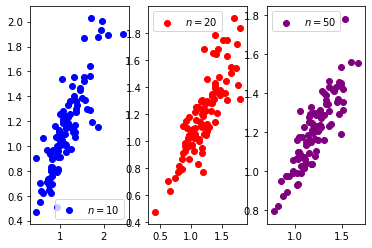

In [28]:
fig, axes = plt.subplots(ncols=3, nrows=1) # construct subplots
ax1, ax2, ax3= axes.ravel() # name of each subplot
ax1.scatter(weight_10, weight_10_tilde, c= 'blue', label = r'$n=10$') # n= 10
ax2.scatter(weight_20, weight_20_tilde, c= 'red', label = r'$n=20$')# n= 20
ax3.scatter(weight_50, weight_50_tilde, c= 'purple', label = r'$n=50$')# n= 50
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

#### __Correlation of the diameter__
Like in the case of the weight, let us take the diameter from the Data_list above and compute the correlation using the function ```corrcoef```.

In [29]:
#n=10
diam_10 = np.array([Data_list10[i][0][1] for i in range(len(Data_list10))])
diam_10_tilde = np.array([Data_list10[i][1][1] for i in range(len(Data_list10))])

#n=20
diam_20 = np.array([Data_list20[i][0][1] for i in range(len(Data_list20))])
diam_20_tilde = np.array([Data_list20[i][1][1] for i in range(len(Data_list20))])

#n=50
diam_50 = np.array([Data_list50[i][0][1] for i in range(len(Data_list50))])
diam_50_tilde = np.array([Data_list50[i][1][1] for i in range(len(Data_list50))])

In [30]:
[np.corrcoef(diam_10 ,diam_10_tilde)[0][1], np.corrcoef(diam_20 ,diam_20_tilde)[0][1], np.corrcoef(diam_50 ,weight_50_tilde)[0][1] ] # correlation of the diameters

[0.4596567840750998, 0.4678396537118566, -0.04473571336811766]

### Result: the correlation of the diameters gets close to zero when $n$ goes to the infinity.

In order to visualize our result, let us scattreplot $\mathrm{diam}(\{U_e\})$ against $\mathrm{diam}(\{\tilde{U}_e\}).$

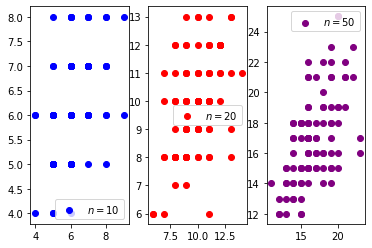

In [32]:
fig, axes = plt.subplots(ncols=3, nrows=1) # create subplots
ax1, ax2, ax3= axes.ravel()

# plot for n=10, 30 and 50
ax1.scatter(diam_10, diam_10_tilde, c= 'blue', label = r'$n=10$')
ax2.scatter(diam_20, diam_20_tilde, c= 'red', label = r'$n=20$')
ax3.scatter(diam_50, diam_50_tilde, c= 'purple', label = r'$n=50$')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()